In [1]:
### ValDXer testing
import os
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings(name='test')

VDX = ValDXer(settings)

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name test already exists. Attempting to change name to test0
Experiment name test already exists. Attempting to change name to test1
Experiment name test already exists. Attempting to change name to test2
Experiment name test already exists. Attempting to change name to test3
Experiment name test already exists. Attempting to change name to test4
Experiment name test already exists. Attempting to change name to test5
Experiment name test already exists. Attempting to change name to test6
Experiment name test already exists. Attempting to change name to test7
Experiment name test already exists. Attempting to change name to test8
Experiment name test already exists. Attempting to change name to test9
Experiment name test already exists. Attempting to change name to test10
Experiment name test already exists. Attempting to change name to test11
Experiment name test already exists. Attempting to change name 

In [2]:
# BPTI data
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"

expt_name = 'BPTI_expt'


In [3]:
expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

os.listdir(expt_dir)

segs_name = "BPTI_residue_segs.txt"
segs_path = os.path.join(expt_dir, segs_name)

hdx_name = "BPTI_expt_dfracs.dat"
hdx_path = os.path.join(expt_dir, hdx_name)
print(hdx_path)

rates_name = "BPTI_Intrinsic_rates.dat"
rates_path = os.path.join(expt_dir, rates_name)


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat


In [4]:

VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)


Preparing HDX data for BPTI_expt
AVG: ncol = 6, len(names) = 4


In [5]:
print(VDX.paths)


                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   

                                                 SEG  calc_name  experimental  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  BPTI_expt         False   
1                                                NaN  BPTI_expt         False   

                                           int_rates  
0                                                NaN  
1  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  


In [6]:
sim_name = 'BPTI_MD'

sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

os.listdir(sim_dir)

md_reps = 5

rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

top_name = "bpti_5pti_eq6_protonly.gro"

top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

traj_name = "bpti_5pti_reimg_protonly.xtc"

traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

print(top_path)
print(traj_paths)


VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=sim_name)

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro
['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_2/bpti_5pti_reimg_protonly.xtc', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_3/bpti_5pti_reimg_protonly.xtc', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_4/bpti_5pti_reimg_protonly.xtc', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXe

In [7]:
print((traj_paths))


['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_2/bpti_5pti_reimg_protonly.xtc', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_3/bpti_5pti_reimg_protonly.xtc', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_4/bpti_5pti_reimg_protonly.xtc', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_5/bpti_5pti_reimg_protonly.xtc']


In [8]:
test_name = "BPTI_RW_test"
VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)


                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...     BPTI_expt   
1                                                NaN     BPTI_expt   
2                                                NaN       BPTI_MD   
3                                                NaN  BPTI_RW_test   

  experimental                                          int_rates  \
0        False                                                NaN   
1        False  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
2          NaN                                                NaN   
3          NaN                                                NaN   

                      

Saved train BPTI_RW_test segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_1/train_residue_segs__BPTI_RW_test_.txt
Train Peptide numbers: [ 0  1  2  3  4  5  6  8  9 11 12 13 15 16 17 19 21 23 24 25 26 27 29 30
 31 32 33 34 35 36 37 39 40]
Saved val BPTI_RW_test segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_1/val_residue_segs__BPTI_RW_test_.txt
Val Peptide numbers: [ 7 10 14 18 20 22 28 38]
    ResStr  ResEnd    0.167      1.0     10.0    120.0  peptide  \
0       34      35  0.00109  0.00649  0.06306  0.54232       24   
1       22      23  0.00000  0.00000  0.00003  0.00037       13   
2       17      18  0.00028  0.00165  0.01638  0.17975        8   
3       35      36  0.01528  0.08809  0.60233  0.99998       25   
4       11      12  0.99880  1.00000  1.00000  1.00000        4   
5       55      56  0.17

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
BPTI_expt BPTI_RW_test True 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_1/train_BPTI_RW_test_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_1/out__train_BPTI_RW_test_1Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_1/reweighting_gamma_6x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_1/reweighting_gamma_3x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_1/reweig

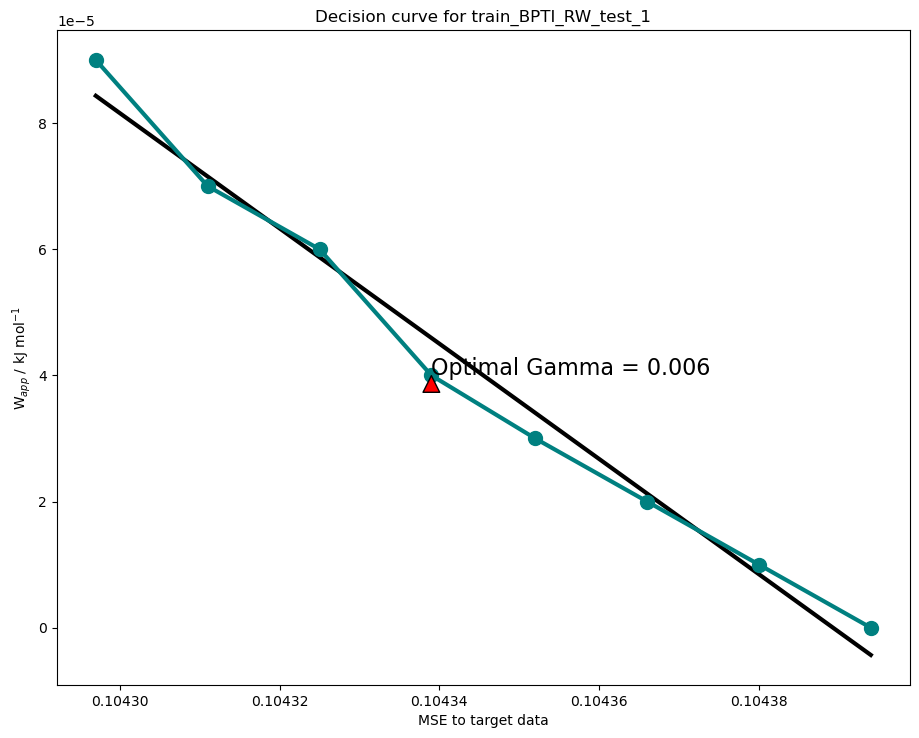

Optimal gamma for train_BPTI_RW_test_1 is 6x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_1/reweighting_gamma_6x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.00011  0.00065  0.00644  0.07463        0
1  0.00009  0.00057  0.00566  0.06587        1
2  0.00733  0.04308  0.35619  0.99493        2
3  0.00005  0.00029  0.00292  0.03444        3
4  0.97019  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.00011  0.00065  0.00644  0.07463        0
1   0.00009  0.00057  0.00566  0.06587        1
2   0.00733  0.04308  0.35619  0.99493        2
3   0.00005  0.00029  0.00292  0.03444        3
4   0.97019  1.00000  1.00000  1.00000        4
5   0.02006  0.11429  0.70289  1.00000        5
6   0.06228  0.31958  0.97873  1.00000        6
7   0.00795  0.04666  0.37986  0.99676        7
8   1.00000  1.00

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
BPTI_expt BPTI_RW_test False 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_1/val_BPTI_RW_test_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_1/out__val_BPTI_RW_test_1Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_1/reweighting_gamma_2x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_1/reweighting_gamma_7x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_1/reweighting_gamma_3x1

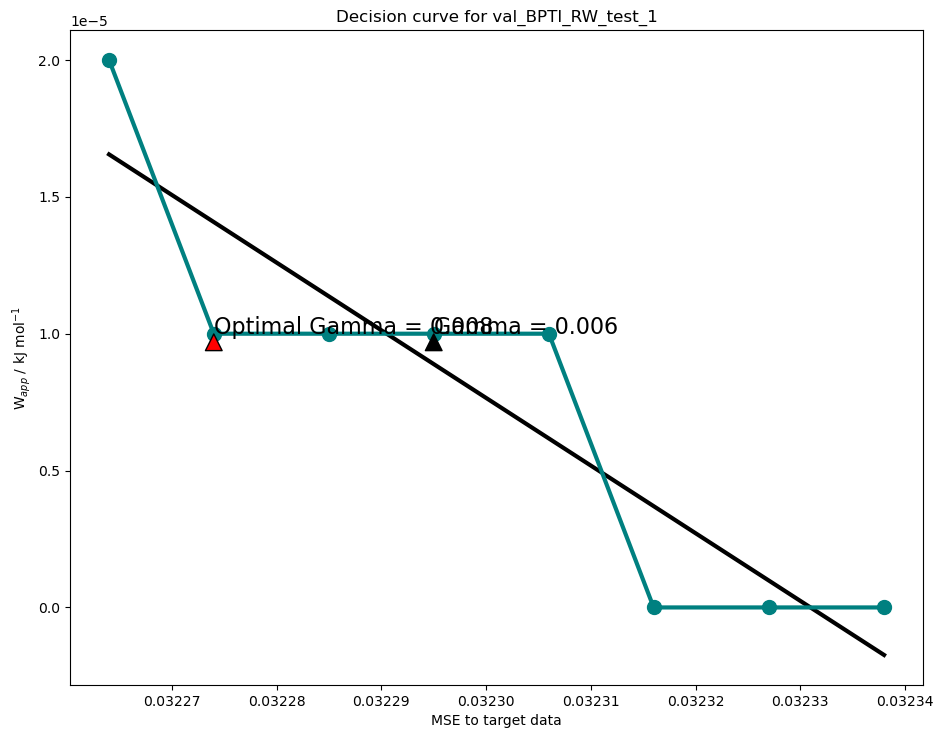

Optimal gamma for val_BPTI_RW_test_1 is 8x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_1/reweighting_gamma_6x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.43605  0.96761  1.00000  1.00000        0
1  0.00029  0.00174  0.01724  0.18834        1
2  0.00231  0.01375  0.12931  0.81018        2
3  0.00196  0.01166  0.11069  0.75531        3
4  0.00142  0.00845  0.08131  0.63858        4
     0.167      1.0     10.0    120.0  peptide
0  0.43605  0.96761  1.00000  1.00000        0
1  0.00029  0.00174  0.01724  0.18834        1
2  0.00231  0.01375  0.12931  0.81018        2
3  0.00196  0.01166  0.11069  0.75531        3
4  0.00142  0.00845  0.08131  0.63858        4
5  0.00083  0.00493  0.04825  0.44757        5
6  0.27475  0.85392  1.00000  1.00000        6
7  0.15271  0.62928  0.99995  1.00000        7
     0.167      1.0     10.0   

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
BPTI_expt BPTI_RW_test True 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_2/train_BPTI_RW_test_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_2/out__train_BPTI_RW_test_2Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_2/reweighting_gamma_8x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_2/reweighting_gamma_7x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_2/reweig

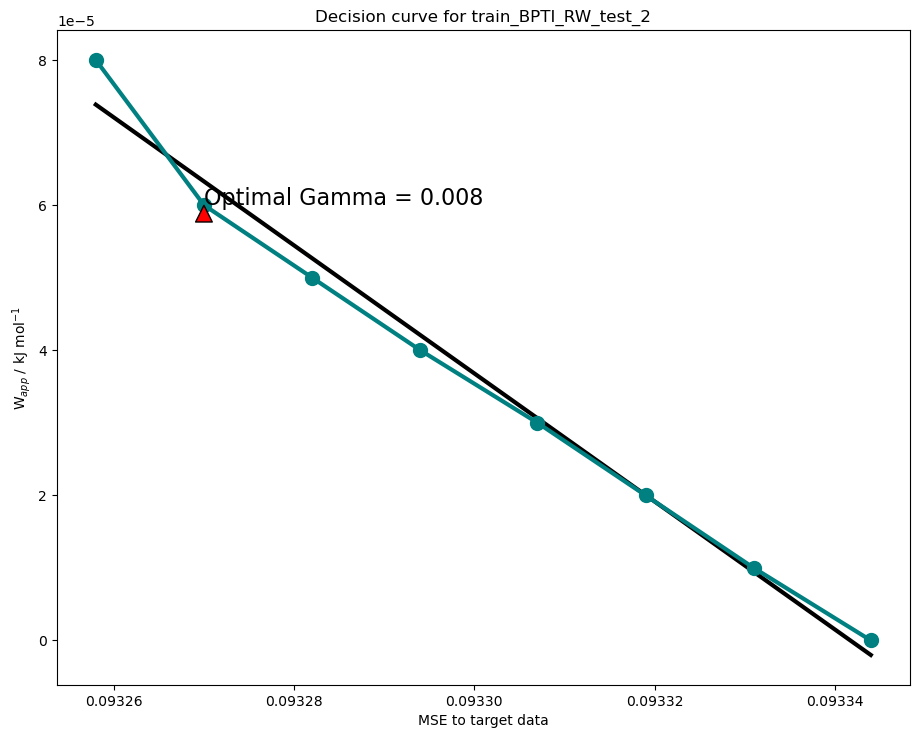

Optimal gamma for train_BPTI_RW_test_2 is 8x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_2/reweighting_gamma_8x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.00231  0.01375  0.12931  0.81018        0
1  0.78396  0.99990  1.00000  1.00000        1
2  0.00142  0.00845  0.08132  0.63862        2
3  0.01108  0.06452  0.48671  0.99967        3
4  0.98972  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.00231  0.01375  0.12931  0.81018        0
1   0.78396  0.99990  1.00000  1.00000        1
2   0.00142  0.00845  0.08132  0.63862        2
3   0.01108  0.06452  0.48671  0.99967        3
4   0.98972  1.00000  1.00000  1.00000        4
5   0.00011  0.00065  0.00644  0.07464        5
6   0.43609  0.96762  1.00000  1.00000        6
7   1.00000  1.00000  1.00000  1.00000        7
8   0.00083  0.00

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
BPTI_expt BPTI_RW_test False 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_2/val_BPTI_RW_test_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_2/out__val_BPTI_RW_test_2Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_2/reweighting_gamma_9x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_2/reweighting_gamma_5x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_2/reweighting_gamma_8x1

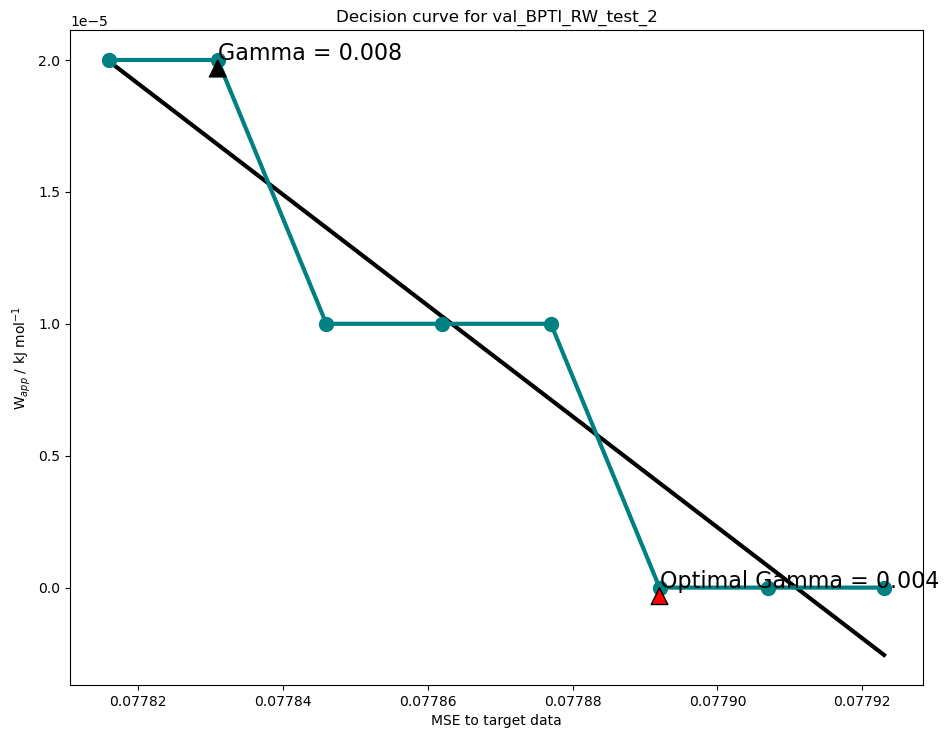

Optimal gamma for val_BPTI_RW_test_2 is 4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_2/reweighting_gamma_8x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0  120.0  peptide
0  0.11767  0.52747  0.99945    1.0        0
1  0.22131  0.77639  1.00000    1.0        1
2  0.97023  1.00000  1.00000    1.0        2
3  0.99137  1.00000  1.00000    1.0        3
4  0.02460  0.13857  0.77498    1.0        4
     0.167      1.0     10.0  120.0  peptide
0  0.11767  0.52747  0.99945    1.0        0
1  0.22131  0.77639  1.00000    1.0        1
2  0.97023  1.00000  1.00000    1.0        2
3  0.99137  1.00000  1.00000    1.0        3
4  0.02460  0.13857  0.77498    1.0        4
5  0.07415  0.36955  0.99008    1.0        5
6  0.14666  0.61314  0.99992    1.0        6
7  0.97531  1.00000  1.00000    1.0        7
     0.167      1.0     10.0  120.0  peptide           calc_n

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
BPTI_expt BPTI_RW_test True 3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_3/train_BPTI_RW_test_3_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_3/out__train_BPTI_RW_test_3Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_3/reweighting_gamma_9x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_3/reweighting_gamma_6x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_3/reweig

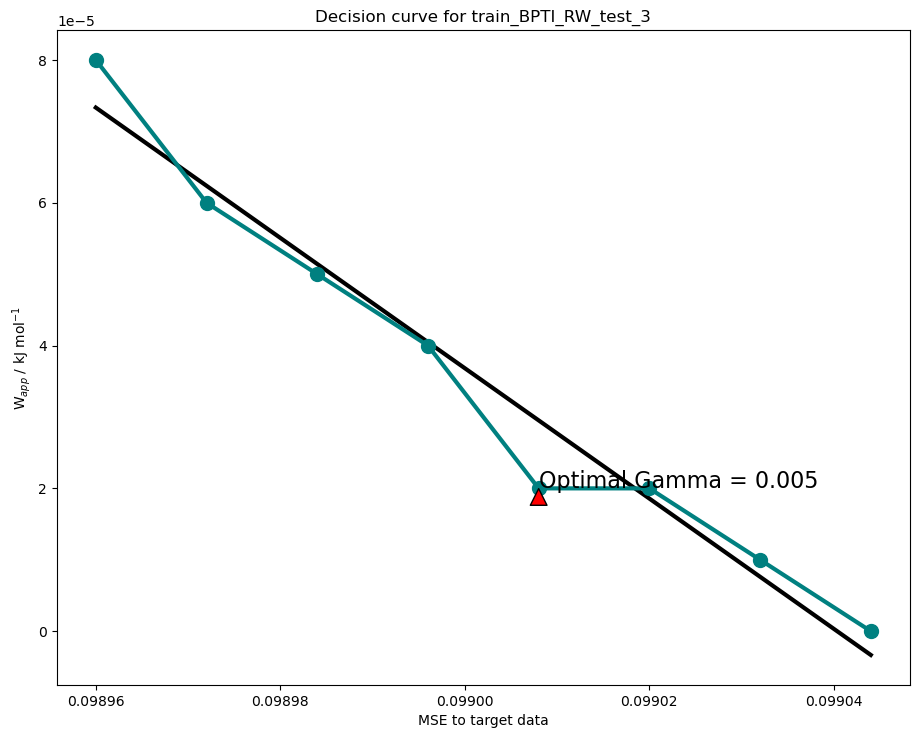

Optimal gamma for train_BPTI_RW_test_3 is 5x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_3/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.12270  0.54335  0.99961  1.00000        0
1  0.78399  0.99990  1.00000  1.00000        1
2  0.00002  0.00009  0.00095  0.01129        2
3  0.74054  0.99969  1.00000  1.00000        3
4  0.00414  0.02454  0.22003  0.94931        4
      0.167      1.0     10.0    120.0  peptide
0   0.12270  0.54335  0.99961  1.00000        0
1   0.78399  0.99990  1.00000  1.00000        1
2   0.00002  0.00009  0.00095  0.01129        2
3   0.74054  0.99969  1.00000  1.00000        3
4   0.00414  0.02454  0.22003  0.94931        4
5   0.00000  0.00000  0.00005  0.00059        5
6   0.99138  1.00000  1.00000  1.00000        6
7   0.27476  0.85393  1.00000  1.00000        7
8   0.00196  0.01

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
BPTI_expt BPTI_RW_test False 3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_3/val_BPTI_RW_test_3_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_3/out__val_BPTI_RW_test_3Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_3/reweighting_gamma_9x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_3/reweighting_gamma_2x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_3/reweighting_gamma_8x1

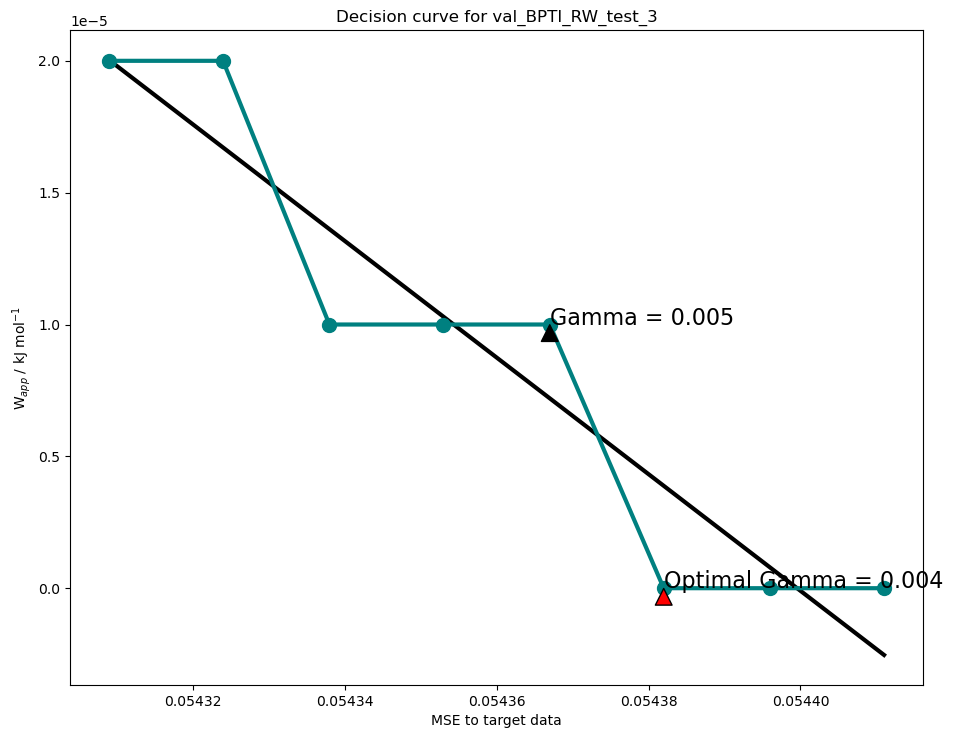

Optimal gamma for val_BPTI_RW_test_3 is 4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_3/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.20500  0.74683  1.00000  1.00000        0
1  0.00142  0.00845  0.08134  0.63872        1
2  0.00083  0.00493  0.04826  0.44764        2
3  0.13210  0.57189  0.99979  1.00000        3
4  0.00194  0.01154  0.10954  0.75148        4
     0.167      1.0     10.0    120.0  peptide
0  0.20500  0.74683  1.00000  1.00000        0
1  0.00142  0.00845  0.08134  0.63872        1
2  0.00083  0.00493  0.04826  0.44764        2
3  0.13210  0.57189  0.99979  1.00000        3
4  0.00194  0.01154  0.10954  0.75148        4
5  0.00143  0.00851  0.08191  0.64140        5
6  0.15271  0.62927  0.99995  1.00000        6
7  0.02006  0.11425  0.70276  1.00000        7
     0.167      1.0     10.0   

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
BPTI_expt BPTI_RW_test True 4
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_4/train_BPTI_RW_test_4_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_4
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_4/out__train_BPTI_RW_test_4Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_4/reweighting_gamma_4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_4/reweighting_gamma_5x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_4/reweig

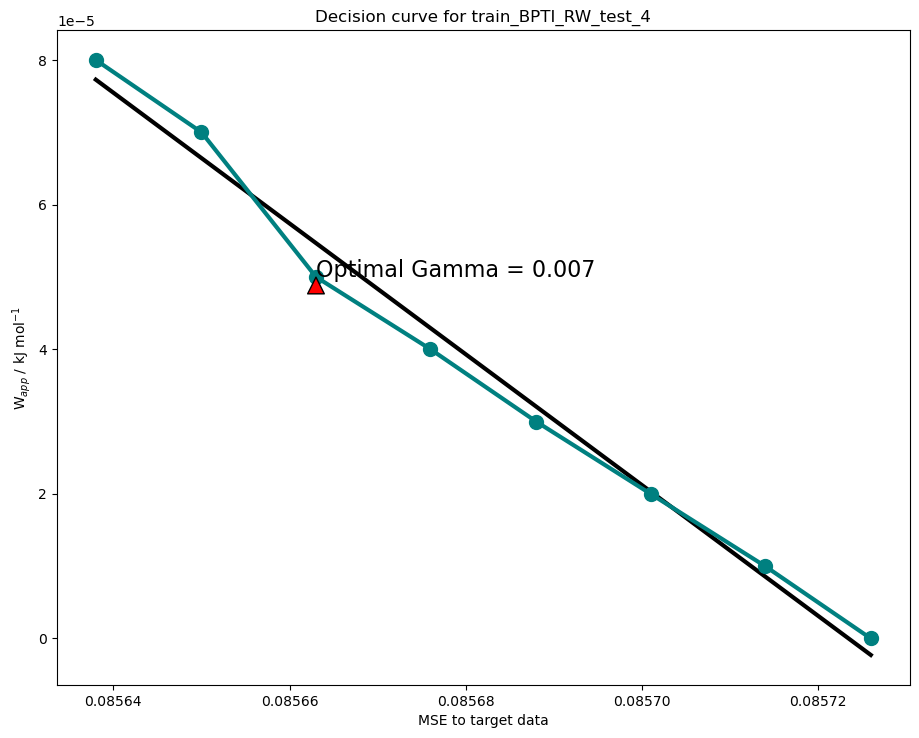

Optimal gamma for train_BPTI_RW_test_4 is 7x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_4/reweighting_gamma_7x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.78402  0.99990  1.00000  1.00000        0
1  0.00009  0.00057  0.00566  0.06587        1
2  0.43599  0.96759  1.00000  1.00000        2
3  0.11776  0.52775  0.99945  1.00000        3
4  0.15265  0.62911  0.99995  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.78402  0.99990  1.00000  1.00000        0
1   0.00009  0.00057  0.00566  0.06587        1
2   0.43599  0.96759  1.00000  1.00000        2
3   0.11776  0.52775  0.99945  1.00000        3
4   0.15265  0.62911  0.99995  1.00000        4
5   0.01108  0.06455  0.48690  0.99967        5
6   0.19095  0.71884  1.00000  1.00000        6
7   0.00142  0.00845  0.08134  0.63872        7
8   0.18317  0.70

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
BPTI_expt BPTI_RW_test False 4
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_4/val_BPTI_RW_test_4_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_4
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_4/out__val_BPTI_RW_test_4Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_4/reweighting_gamma_2x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_4/reweighting_gamma_4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_4/reweighting_gamma_6x1

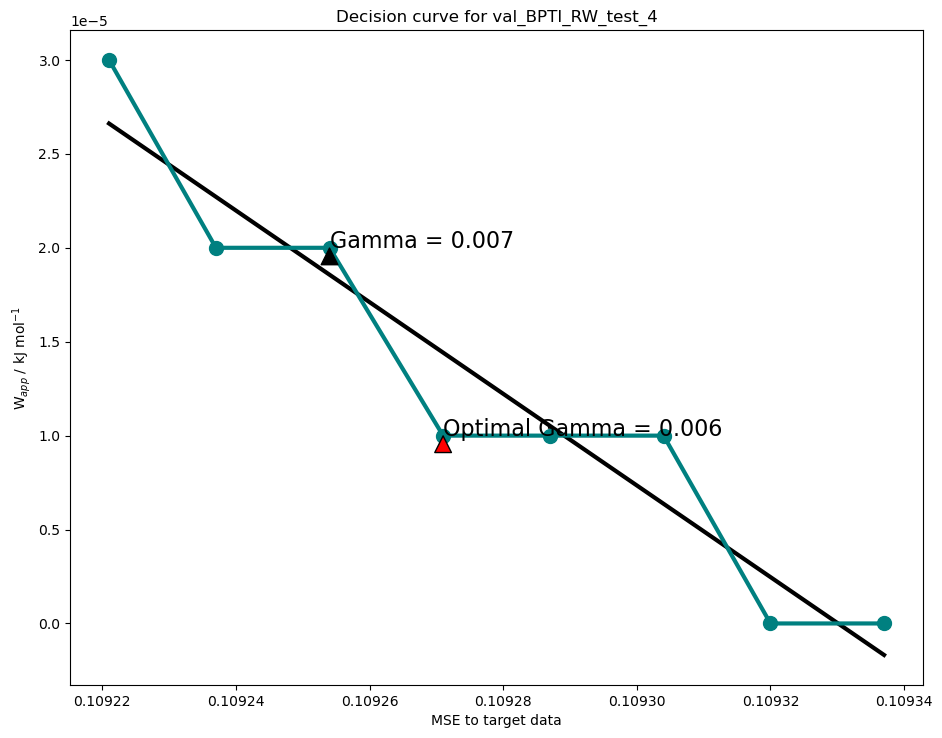

Optimal gamma for val_BPTI_RW_test_4 is 6x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_4/reweighting_gamma_7x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.20513  0.74709  1.00000  1.00000        0
1  0.97017  1.00000  1.00000  1.00000        1
2  0.00002  0.00009  0.00094  0.01128        2
3  0.74053  0.99969  1.00000  1.00000        3
4  0.07413  0.36947  0.99007  1.00000        4
     0.167      1.0     10.0    120.0  peptide
0  0.20513  0.74709  1.00000  1.00000        0
1  0.97017  1.00000  1.00000  1.00000        1
2  0.00002  0.00009  0.00094  0.01128        2
3  0.74053  0.99969  1.00000  1.00000        3
4  0.07413  0.36947  0.99007  1.00000        4
5  0.97535  1.00000  1.00000  1.00000        5
6  0.61904  0.99691  1.00000  1.00000        6
7  0.00193  0.01152  0.10939  0.75097        7
     0.167      1.0     10.0   

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
BPTI_expt BPTI_RW_test True 5
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_5/train_BPTI_RW_test_5_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_5
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_5/out__train_BPTI_RW_test_5Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_5/reweighting_gamma_6x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_5/reweighting_gamma_4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_5/reweig

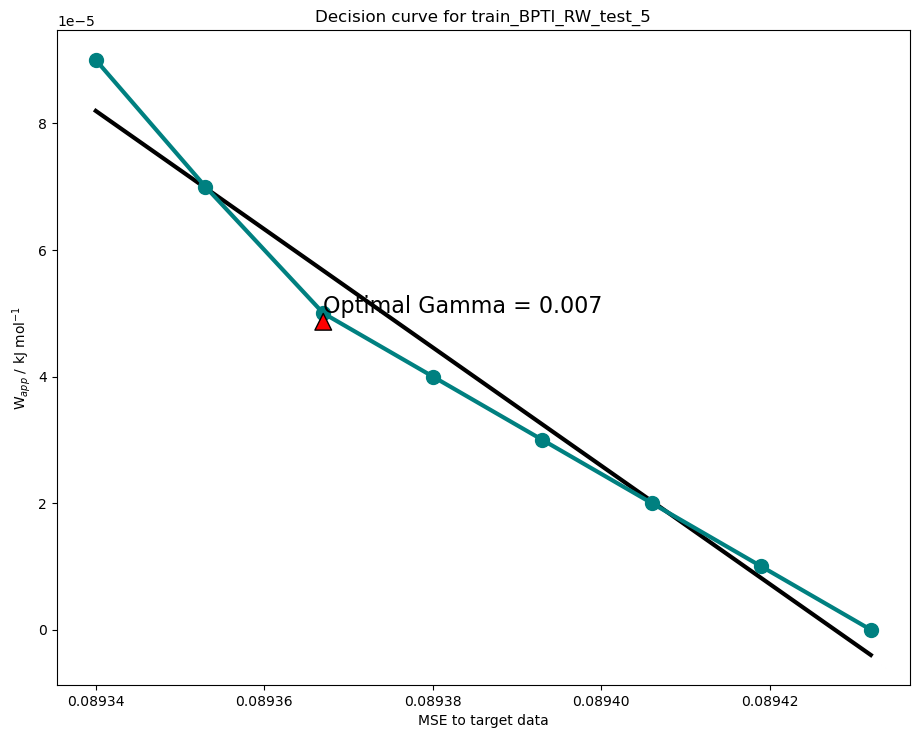

Optimal gamma for train_BPTI_RW_test_5 is 7x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/train_BPTI_RW_test_5/reweighting_gamma_7x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.20509  0.74702  1.00000  1.00000        0
1  0.00795  0.04665  0.37980  0.99676        1
2  0.98972  1.00000  1.00000  1.00000        2
3  0.97013  1.00000  1.00000  1.00000        3
4  0.02460  0.13857  0.77498  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.20509  0.74702  1.00000  1.00000        0
1   0.00795  0.04665  0.37980  0.99676        1
2   0.98972  1.00000  1.00000  1.00000        2
3   0.97013  1.00000  1.00000  1.00000        3
4   0.02460  0.13857  0.77498  1.00000        4
5   0.00029  0.00174  0.01724  0.18837        5
6   0.19094  0.71883  1.00000  1.00000        6
7   0.02006  0.11428  0.70286  1.00000        7
8   0.43603  0.96

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
BPTI_expt BPTI_RW_test False 5
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_5/val_BPTI_RW_test_5_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_5
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_5/out__val_BPTI_RW_test_5Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_5/reweighting_gamma_9x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_5/reweighting_gamma_5x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_5/reweighting_gamma_2x1

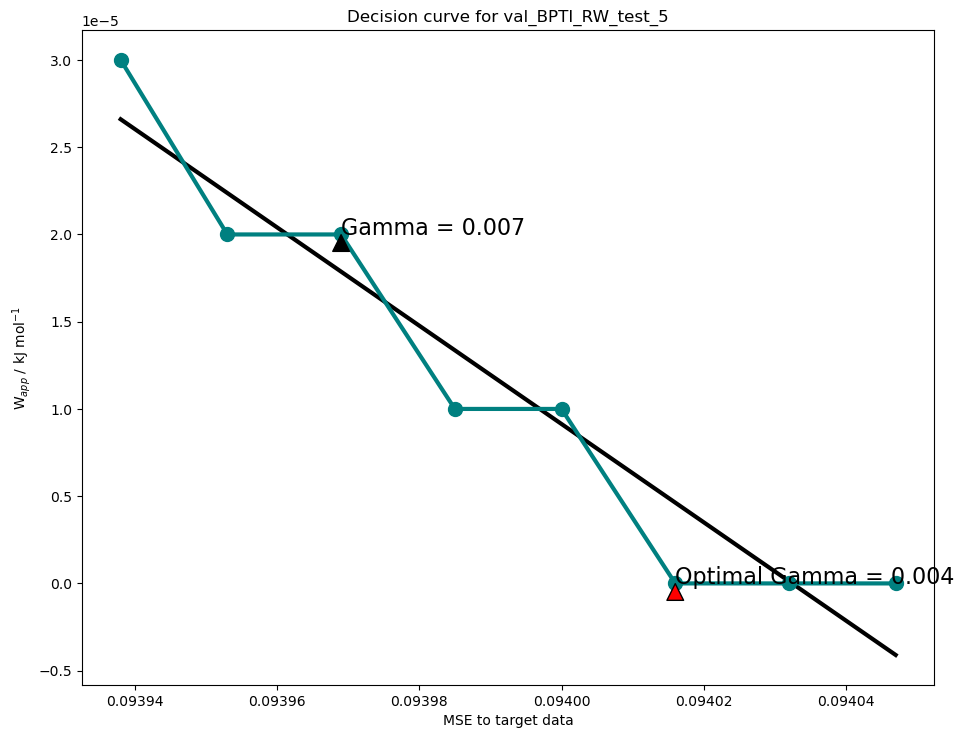

Optimal gamma for val_BPTI_RW_test_5 is 4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test312/val_BPTI_RW_test_5/reweighting_gamma_7x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.22136  0.77647  1.00000  1.00000        0
1  0.78400  0.99990  1.00000  1.00000        1
2  0.00002  0.00009  0.00095  0.01129        2
3  0.99138  1.00000  1.00000  1.00000        3
4  0.00196  0.01167  0.11076  0.75553        4
     0.167      1.0     10.0    120.0  peptide
0  0.22136  0.77647  1.00000  1.00000        0
1  0.78400  0.99990  1.00000  1.00000        1
2  0.00002  0.00009  0.00095  0.01129        2
3  0.99138  1.00000  1.00000  1.00000        3
4  0.00196  0.01167  0.11076  0.75553        4
5  0.06230  0.31969  0.97876  1.00000        5
6  0.14661  0.61301  0.99992  1.00000        6
7  1.00000  1.00000  1.00000  1.00000        7
     0.167      1.0     10.0   

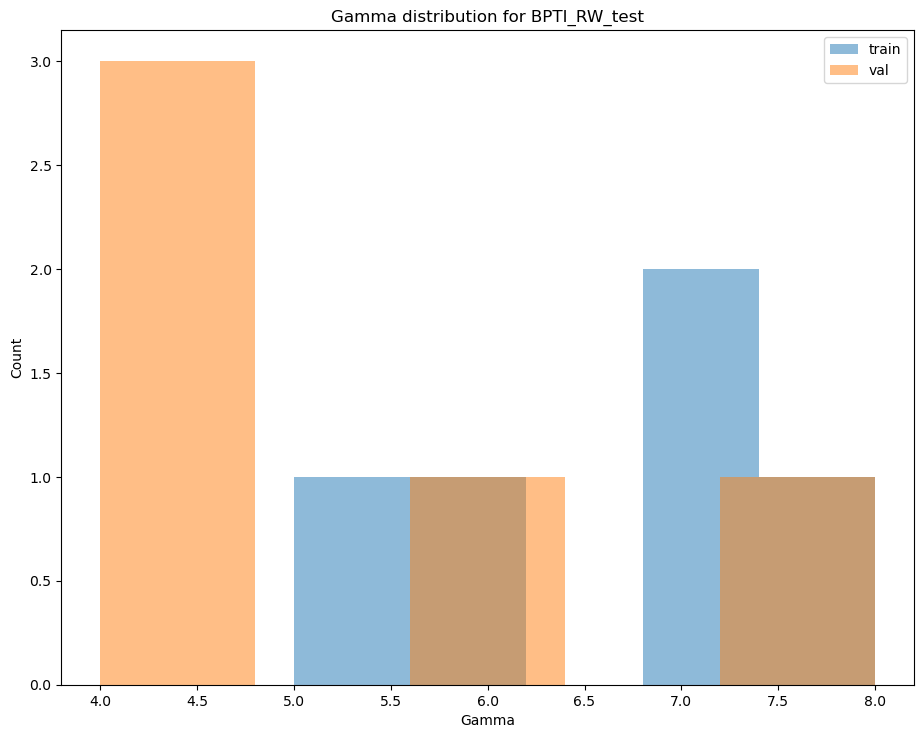

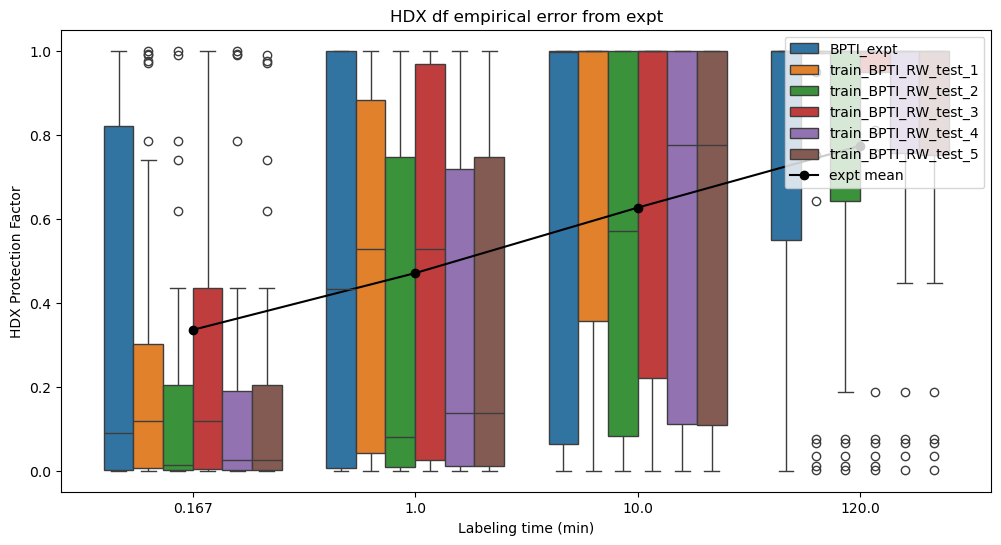

plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0           BPTI_expt
1    0.09039  0.43293  0.99656  1.00000        1           BPTI_expt
2    0.02665  0.14933  0.80157  1.00000        2           BPTI_expt
3    0.18680  0.71010  1.00000  1.00000        3           BPTI_expt
4    0.99880  1.00000  1.00000  1.00000        4           BPTI_expt
..       ...      ...      ...      ...      ...                 ...
241  0.99138  1.00000  1.00000  1.00000        3  val_BPTI_RW_test_5
242  0.00196  0.01167  0.11076  0.75553        4  val_BPTI_RW_test_5
243  0.06230  0.31969  0.97876  1.00000        5  val_BPTI_RW_test_5
244  0.14661  0.61301  0.99992  1.00000        6  val_BPTI_RW_test_5
245  1.00000  1.00000  1.00000  1.00000        7  val_BPTI_RW_test_5

[246 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide  calc_name
0   0.15669  0.63957  0.99996  1.00000        0  BPTI_expt
1   0.0903

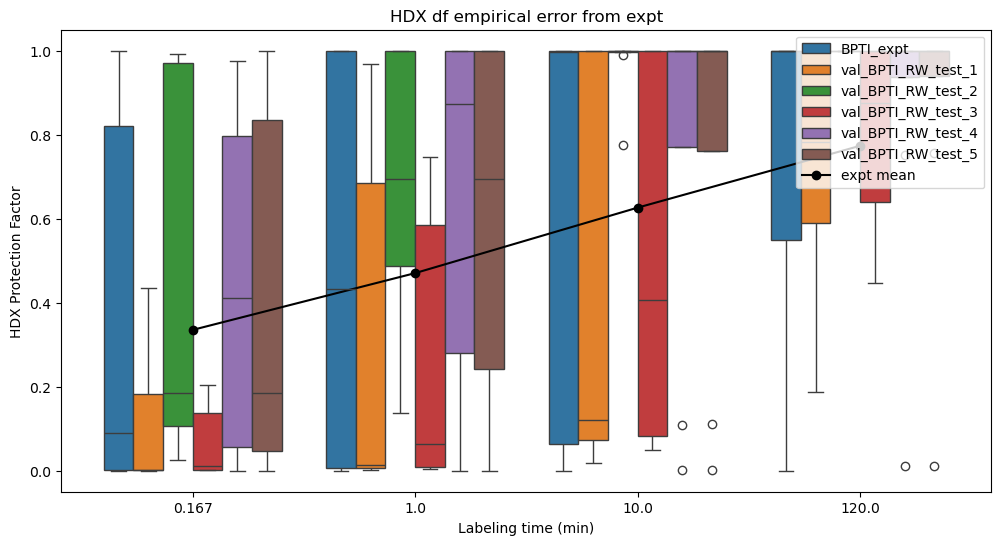

manual merge df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00065  0.00644  0.07463     24.0  train_BPTI_RW_test_1
1    0.00009  0.00057  0.00566  0.06587     13.0  train_BPTI_RW_test_1
2    0.00733  0.04308  0.35619  0.99493      8.0  train_BPTI_RW_test_1
3    0.00005  0.00029  0.00292  0.03444     25.0  train_BPTI_RW_test_1
4    0.97019  1.00000  1.00000  1.00000      4.0  train_BPTI_RW_test_1
..       ...      ...      ...      ...      ...                   ...
200  0.99138  1.00000  1.00000  1.00000      NaN    val_BPTI_RW_test_5
201  0.00196  0.01167  0.11076  0.75553      NaN    val_BPTI_RW_test_5
202  0.06230  0.31969  0.97876  1.00000      NaN    val_BPTI_RW_test_5
203  0.14661  0.61301  0.99992  1.00000      NaN    val_BPTI_RW_test_5
204  1.00000  1.00000  1.00000  1.00000      NaN    val_BPTI_RW_test_5

[205 rows x 6 columns]
train segs [24 13  8 25  4 40 19 39 29  6 26 12 17  9 15 32 16 35 34  0 27  5 11  1
 30 21  2 31 37  3 36 23

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:573: RuntimeWarning: invalid value encountered in cast
  peptides = df['peptide'].values.astype(int)


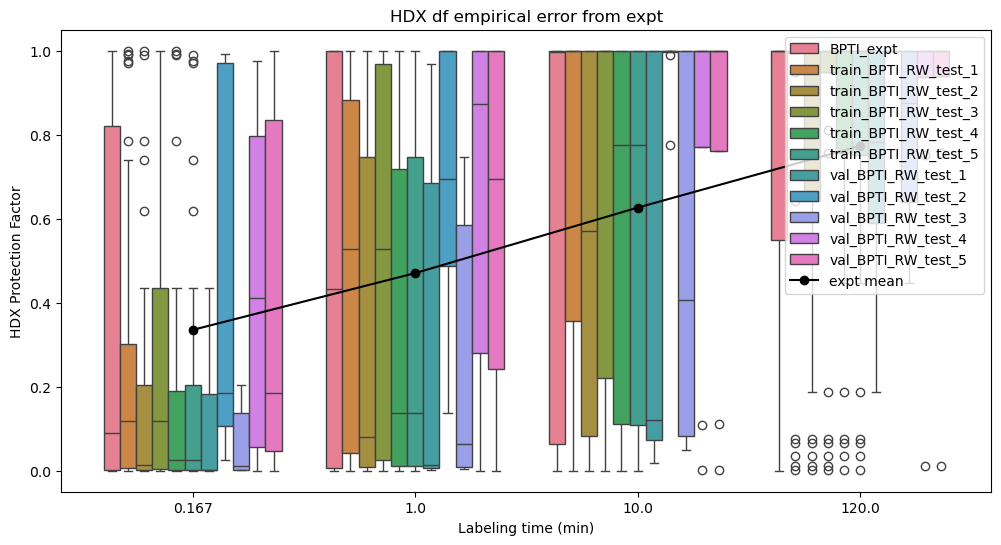

plotting paired errors
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000      0.0           BPTI_expt
1    0.09039  0.43293  0.99656  1.00000      1.0           BPTI_expt
2    0.02665  0.14933  0.80157  1.00000      2.0           BPTI_expt
3    0.18680  0.71010  1.00000  1.00000      3.0           BPTI_expt
4    0.99880  1.00000  1.00000  1.00000      4.0           BPTI_expt
..       ...      ...      ...      ...      ...                 ...
241  0.99138  1.00000  1.00000  1.00000      NaN  val_BPTI_RW_test_5
242  0.00196  0.01167  0.11076  0.75553      NaN  val_BPTI_RW_test_5
243  0.06230  0.31969  0.97876  1.00000      NaN  val_BPTI_RW_test_5
244  0.14661  0.61301  0.99992  1.00000      NaN  val_BPTI_RW_test_5
245  1.00000  1.00000  1.00000  1.00000      NaN  val_BPTI_RW_test_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:799: RuntimeWarning: invalid value encountered in cast
  peptides = df["peptide"].values.astype(int)


nan
train_BPTI_RW_test_3 values
107    0.12270
108    0.78399
109    0.00002
110    0.74054
111    0.00414
112    0.00000
113    0.99138
114    0.27476
115    0.00196
116    0.30176
117    0.14652
118    0.02460
119    0.01108
120    0.00733
121    0.22162
122    0.19095
123    0.06225
124    0.00029
125    0.11774
126    0.00011
127    0.97531
128    0.00231
129    0.01398
130    0.18322
131    0.97018
132    0.07410
133    0.00009
134    0.98973
135    1.00000
136    0.61978
137    0.43590
138    0.00794
139    0.00005
Name: 0.167, dtype: float64
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Values to compute R values
[0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669, 0.15669]
[0.1227, 0.78399, 2e-05, 0.74054, 0.00414, 0.0, 0.99

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


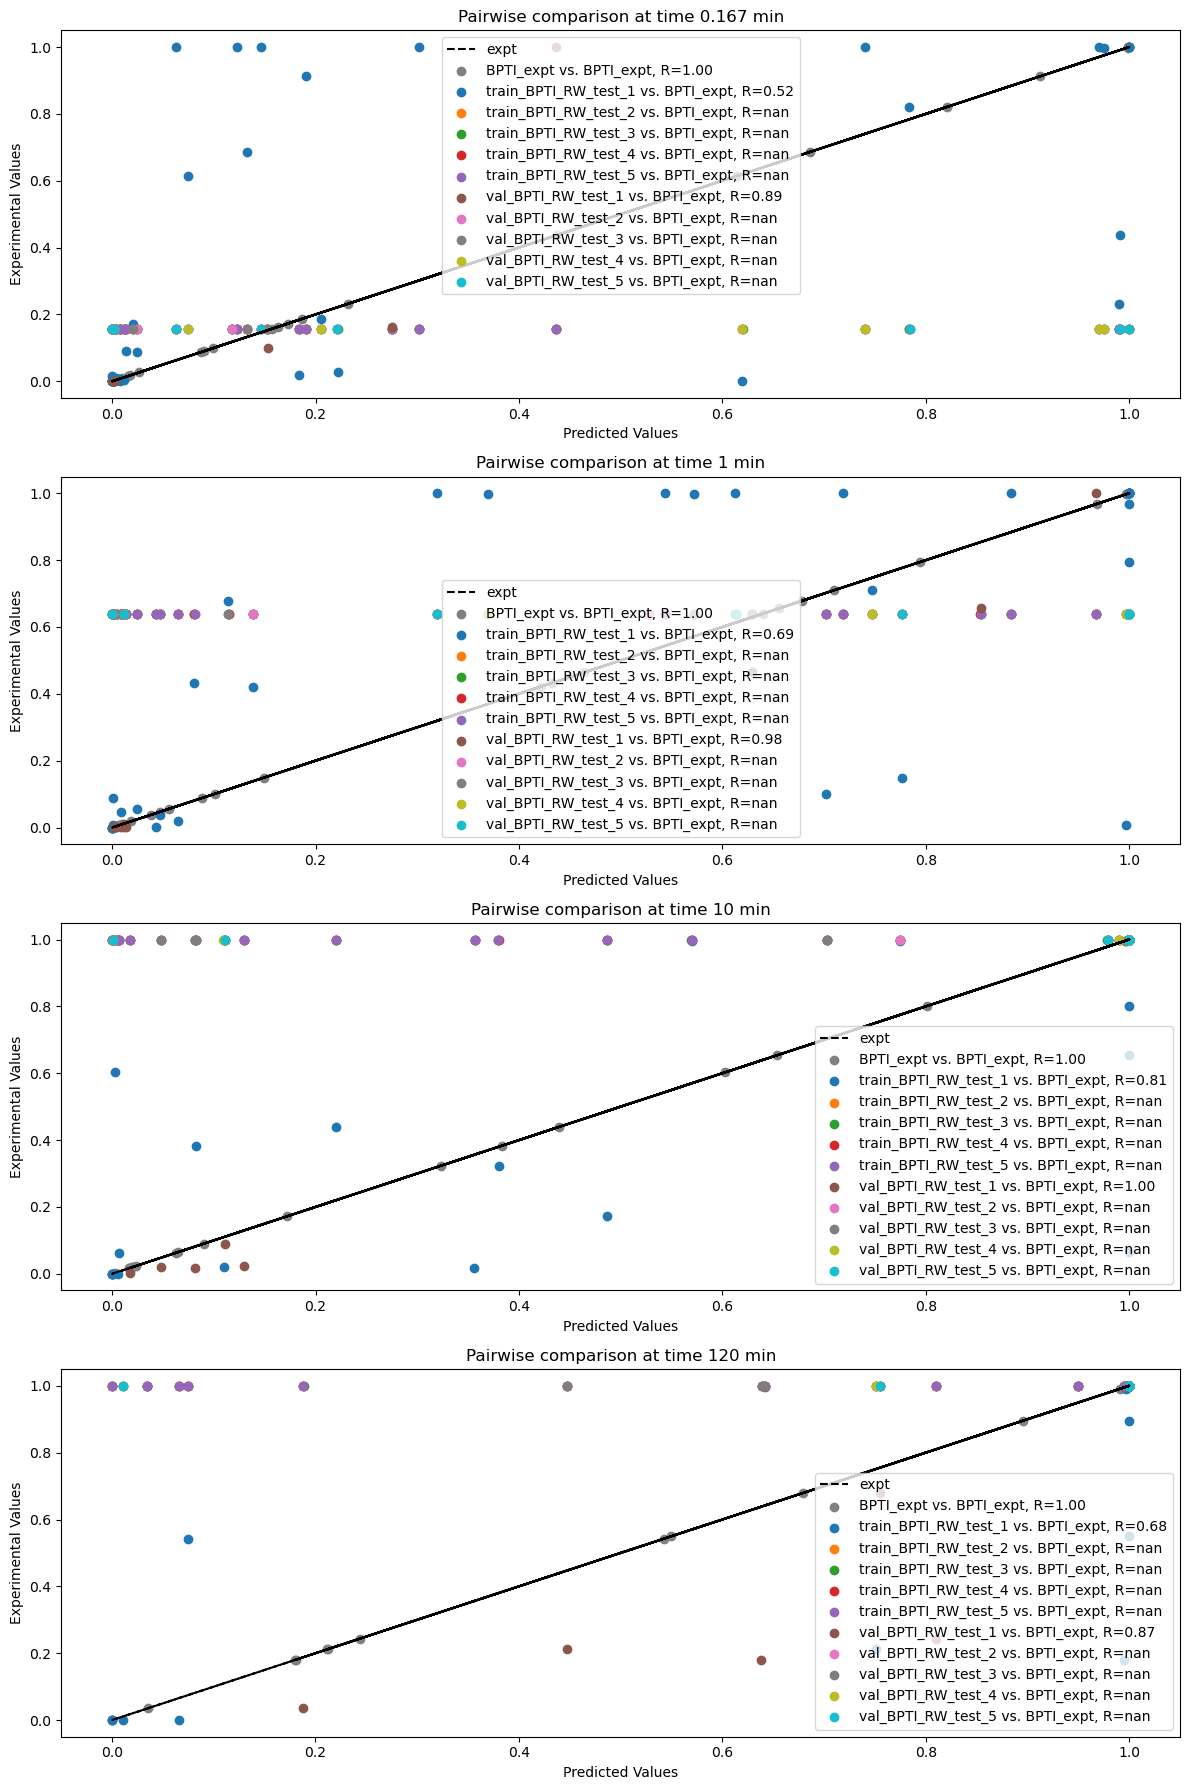

nan_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00065  0.00644  0.07463     24.0  train_BPTI_RW_test_1
1    0.00009  0.00057  0.00566  0.06587     13.0  train_BPTI_RW_test_1
2    0.00733  0.04308  0.35619  0.99493      8.0  train_BPTI_RW_test_1
3    0.00005  0.00029  0.00292  0.03444     25.0  train_BPTI_RW_test_1
4    0.97019  1.00000  1.00000  1.00000      4.0  train_BPTI_RW_test_1
..       ...      ...      ...      ...      ...                   ...
405  0.99138  1.00000  1.00000  1.00000      NaN    val_BPTI_RW_test_5
406  0.00196  0.01167  0.11076  0.75553      NaN    val_BPTI_RW_test_5
407  0.06230  0.31969  0.97876  1.00000      NaN    val_BPTI_RW_test_5
408  0.14661  0.61301  0.99992  1.00000      NaN    val_BPTI_RW_test_5
409  1.00000  1.00000  1.00000  1.00000      NaN    val_BPTI_RW_test_5

[410 rows x 6 columns]
nan_df + expt_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00065  0.0064

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:573: RuntimeWarning: invalid value encountered in cast
  peptides = df['peptide'].values.astype(int)


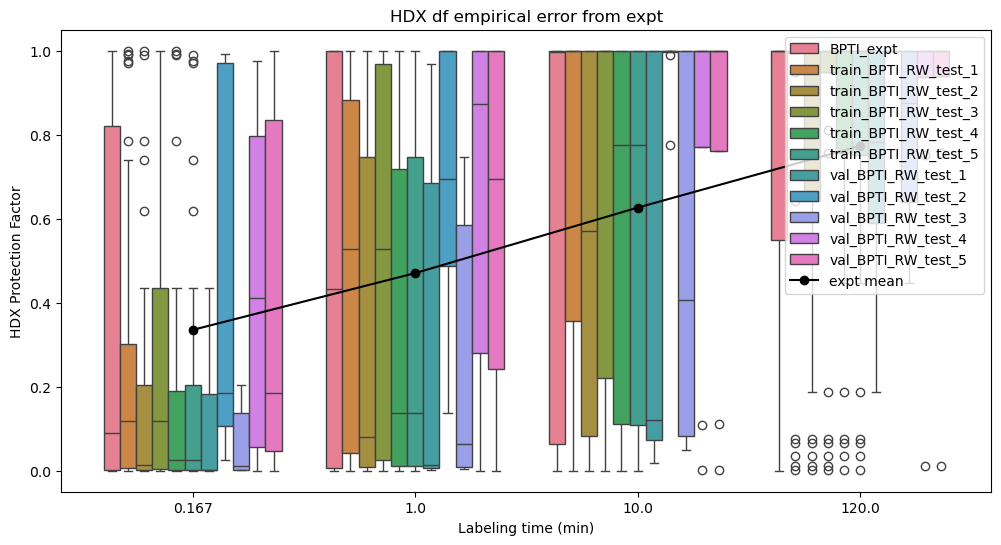

plotting paired errors
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00065  0.00644  0.07463     24.0  train_BPTI_RW_test_1
1    0.00009  0.00057  0.00566  0.06587     13.0  train_BPTI_RW_test_1
2    0.00733  0.04308  0.35619  0.99493      8.0  train_BPTI_RW_test_1
3    0.00005  0.00029  0.00292  0.03444     25.0  train_BPTI_RW_test_1
4    0.97019  1.00000  1.00000  1.00000      4.0  train_BPTI_RW_test_1
..       ...      ...      ...      ...      ...                   ...
446  0.00963  0.05627  0.43963  0.99904     36.0             BPTI_expt
447  0.01757  0.10068  0.65396  1.00000     37.0             BPTI_expt
448  0.09888  0.46390  0.99804  1.00000     38.0             BPTI_expt
449  0.00650  0.03831  0.32339  0.99079     39.0             BPTI_expt
450  0.17259  0.67841  0.99999  1.00000     40.0             BPTI_expt

[451 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-0

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:799: RuntimeWarning: invalid value encountered in cast
  peptides = df["peptide"].values.astype(int)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


nan
expt values
[0.63957, 0.43293, 0.14933, 0.7101, 1.0, 0.99997, 0.79413, 1.0, 0.00165, 1.0, 0.0003, 0.0, 0.0, 0.0, 0.00232, 1.0, 0.968, 0.42191, 0.00943, 1.0, 0.00166, 0.99669, 0.00198, 0.99902, 0.00649, 0.08809, 0.01865, 1.0, 0.65565, 1.0, 1.0, 0.00663, 0.00198, 1.0, 1.0, 0.04724, 0.05627, 0.10068, 0.4639, 0.03831, 0.67841]
BPTI_expt values
410    0.63957
411    0.43293
412    0.14933
413    0.71010
414    1.00000
415    0.99997
416    0.79413
417    1.00000
418    0.00165
419    1.00000
420    0.00030
421    0.00000
422    0.00000
423    0.00000
424    0.00232
425    1.00000
426    0.96800
427    0.42191
428    0.00943
429    1.00000
430    0.00166
431    0.99669
432    0.00198
433    0.99902
434    0.00649
435    0.08809
436    0.01865
437    1.00000
438    0.65565
439    1.00000
440    1.00000
441    0.00663
442    0.00198
443    1.00000
444    1.00000
445    0.04724
446    0.05627
447    0.10068
448    0.46390
449    0.03831
450    0.67841
Name: 1.0, dtype: float64
[ 0  1  2  3 

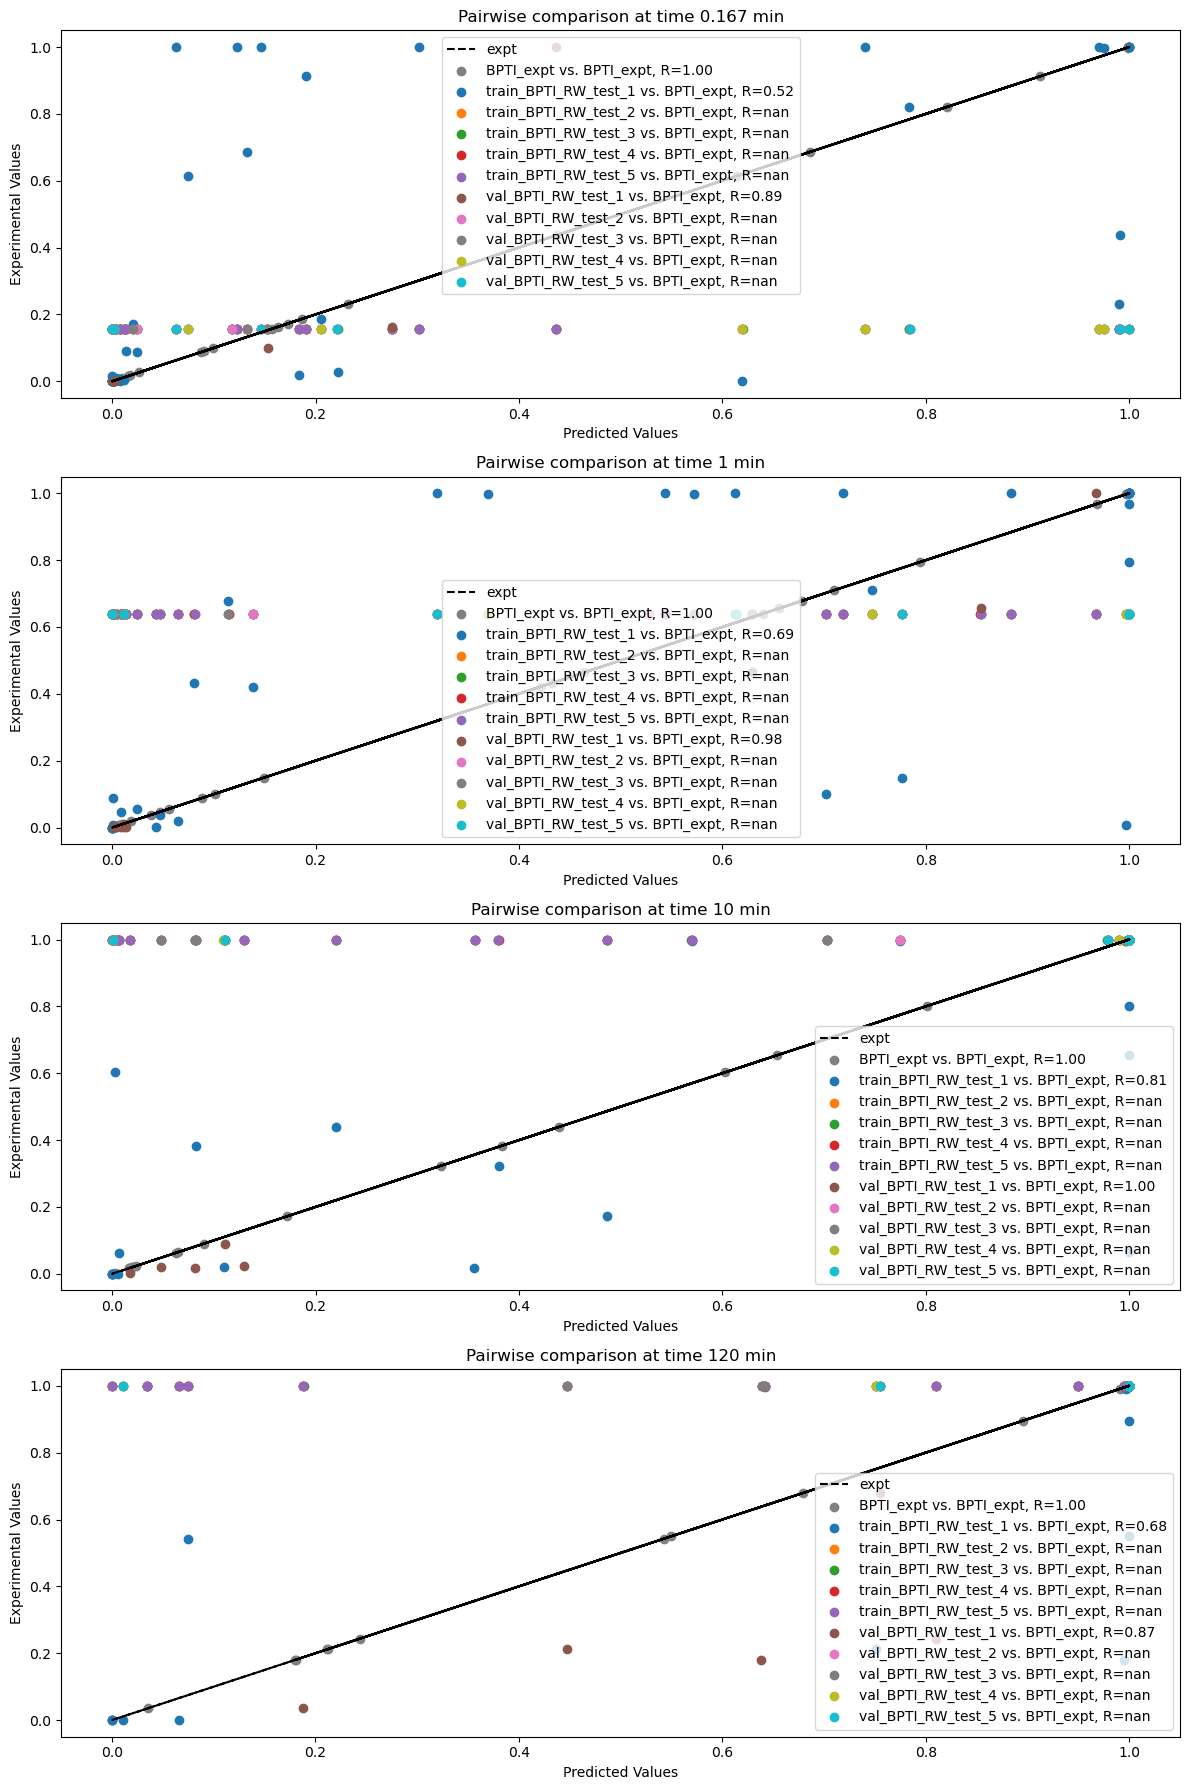

Train coverage: 80.49
Val coverage: 19.51
plot_dfracs_compare
      0.167      1.0     10.0    120.0  peptide             calc_name
0   0.15669  0.63957  0.99996  1.00000      0.0             BPTI_expt
1   0.09039  0.43293  0.99656  1.00000      1.0             BPTI_expt
2   0.02665  0.14933  0.80157  1.00000      2.0             BPTI_expt
3   0.18680  0.71010  1.00000  1.00000      3.0             BPTI_expt
4   0.99880  1.00000  1.00000  1.00000      4.0             BPTI_expt
..      ...      ...      ...      ...      ...                   ...
77  0.00196  0.01166  0.11069  0.75531     18.0  val_BPTI_RW_test_avg
78  0.00231  0.01375  0.12931  0.81018     14.0  val_BPTI_RW_test_avg
79  0.15271  0.62928  0.99995  1.00000     38.0  val_BPTI_RW_test_avg
80  0.27475  0.85392  1.00000  1.00000     28.0  val_BPTI_RW_test_avg
81  0.43605  0.96761  1.00000  1.00000      7.0  val_BPTI_RW_test_avg

[82 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide  calc_name
0   0.15669  0.6

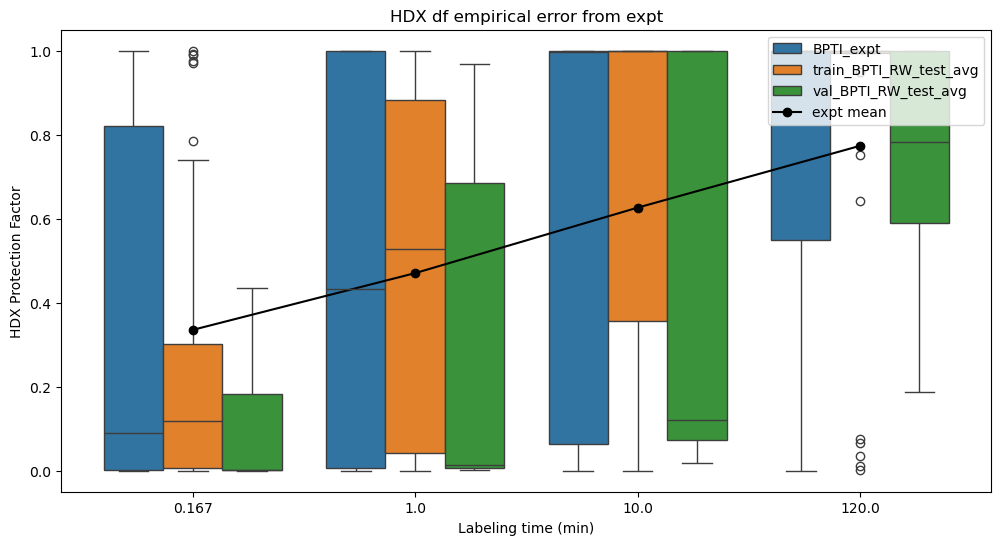

plotting paired errors
      0.167      1.0     10.0    120.0  peptide             calc_name
0   0.15669  0.63957  0.99996  1.00000      0.0             BPTI_expt
1   0.09039  0.43293  0.99656  1.00000      1.0             BPTI_expt
2   0.02665  0.14933  0.80157  1.00000      2.0             BPTI_expt
3   0.18680  0.71010  1.00000  1.00000      3.0             BPTI_expt
4   0.99880  1.00000  1.00000  1.00000      4.0             BPTI_expt
..      ...      ...      ...      ...      ...                   ...
77  0.00196  0.01166  0.11069  0.75531     18.0  val_BPTI_RW_test_avg
78  0.00231  0.01375  0.12931  0.81018     14.0  val_BPTI_RW_test_avg
79  0.15271  0.62928  0.99995  1.00000     38.0  val_BPTI_RW_test_avg
80  0.27475  0.85392  1.00000  1.00000     28.0  val_BPTI_RW_test_avg
81  0.43605  0.96761  1.00000  1.00000      7.0  val_BPTI_RW_test_avg

[82 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 

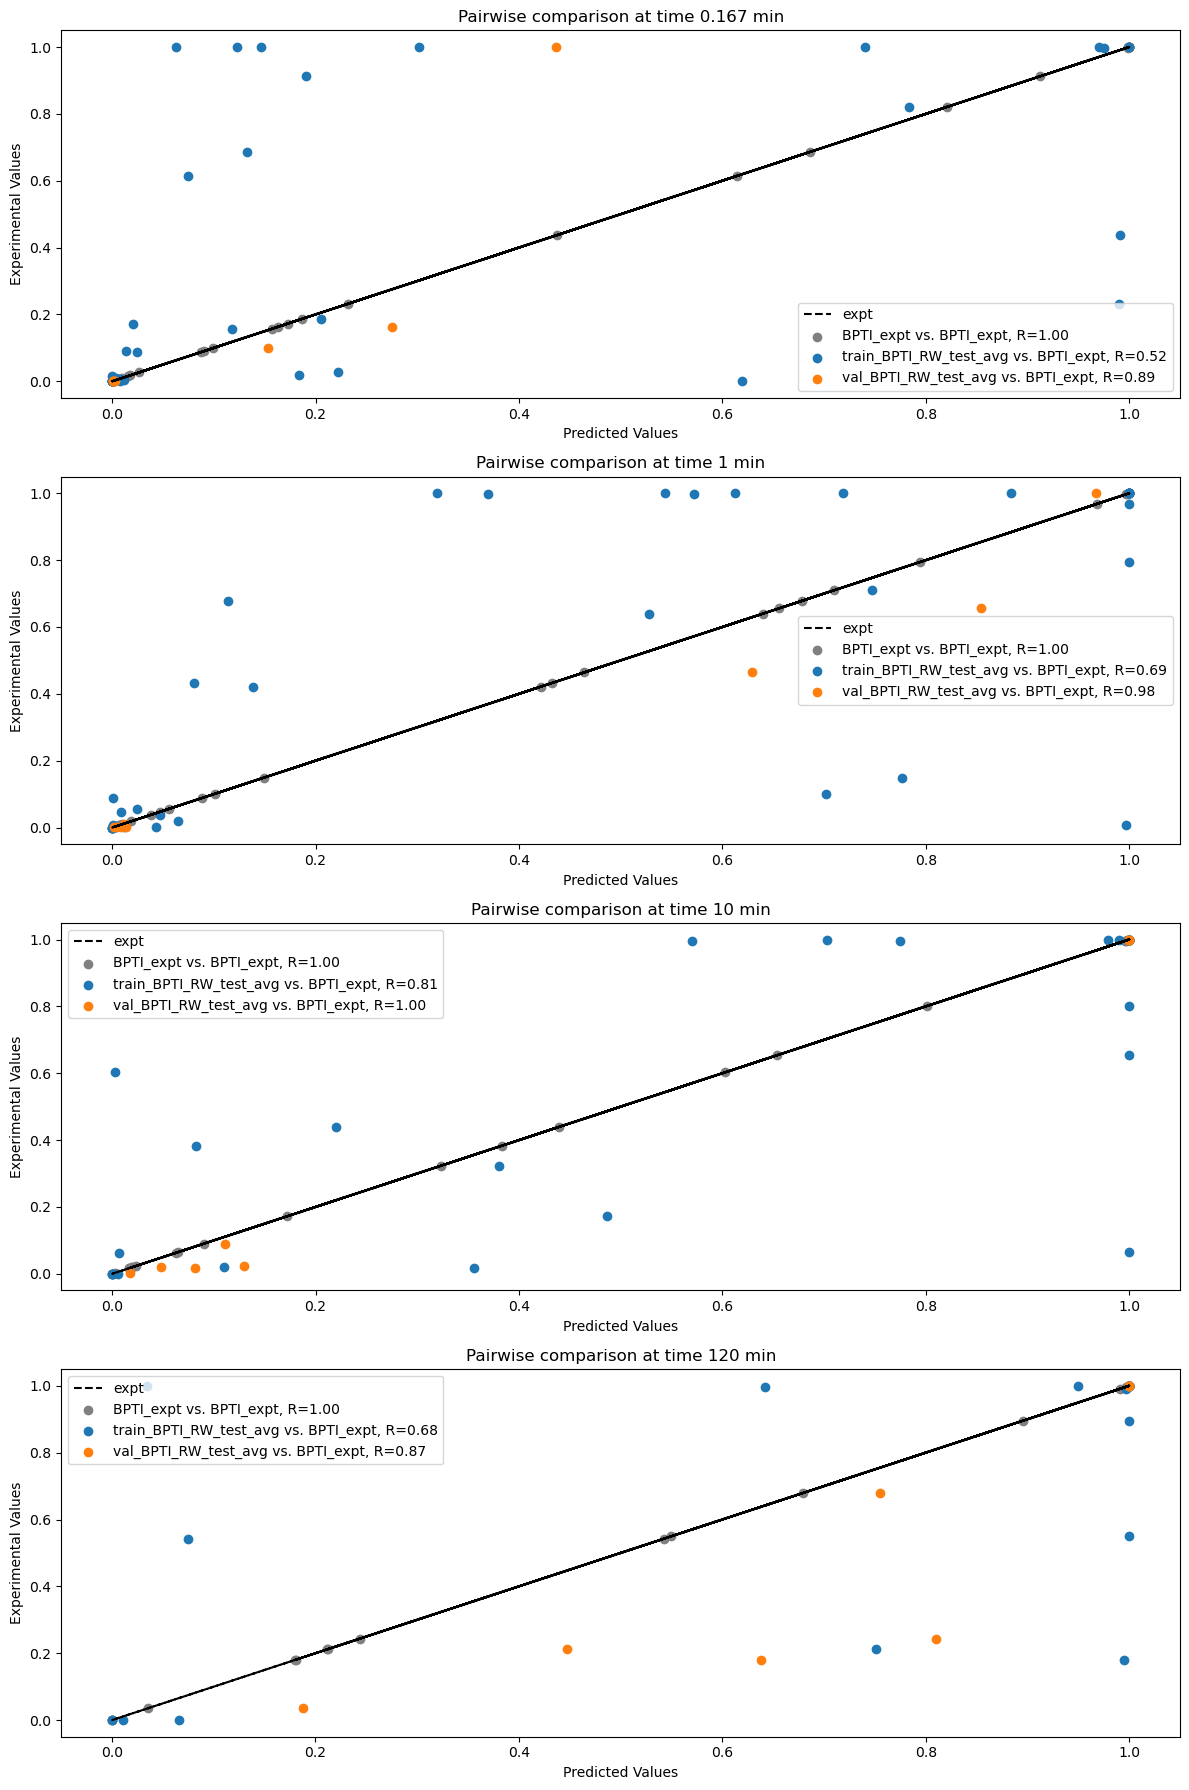

In [9]:
VDX.run_VDX(calc_name=test_name, expt_name=expt_name)

In [10]:
VDX.paths

,HDX,SEG,calc_name,experimental,int_rates,top,traj
0,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,BPTI_expt,False,NaN,NaN,NaN
1,NaN,NaN,BPTI_expt,False,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,NaN,NaN
2,NaN,NaN,BPTI_MD,NaN,NaN,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,[/Users/alexi/Library/CloudStorage/OneDrive-Ne...
3,NaN,NaN,BPTI_RW_test,NaN,NaN,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,[/Users/alexi/Library/CloudStorage/OneDrive-Ne...
4,NaN,NaN,train_BPTI_RW_test_1,False,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,NaN,NaN
5,NaN,NaN,val_BPTI_RW_test_1,False,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,NaN,NaN
6,NaN,NaN,train_BPTI_RW_test_2,False,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,NaN,NaN
7,NaN,NaN,val_BPTI_RW_test_2,False,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,NaN,NaN
8,NaN,NaN,train_BPTI_RW_test_3,False,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,NaN,NaN
9,NaN,NaN,val_BPTI_RW_test_3,False,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,NaN,NaN
